# L3: Text clustering and topic modelling

**Text clustering groups documents** in such a way that documents within a group are **more &lsquo;similar&rsquo; to other documents in the cluster** than to documents not in the cluster. The exact definition of what &lsquo;similar&rsquo; means in this context varies across applications and clustering algorithms.

In this lab you will **experiment with** both **hard and soft clustering** techniques. More specifically, in the first part you will be using the **$k$-means** algorithm, and in the second part you will be using a topic model based on the **Latent Dirichlet Allocation (LDA)**.

In [161]:
# a list of all imports
import pandas as pd
import bz2

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

## Hard clustering data set

The **raw data** for the **hard clustering** part of this lab is a collection of **product reviews**. We have **preprocessed** the **data by tokenization and lowercasing**.

In [162]:
import pandas as pd
import bz2

with bz2.open("reviews.json.bz2") as source:
    df = pd.read_json(source)

When you inspect the data frame, you can see that there are **three labelled columns**: `category` (the product category), `sentiment` (whether the product review was classified as &lsquo;positive&rsquo; or &lsquo;negative&rsquo; towards the product), and `text` (the space-separated text of the review).

In [163]:
df.head()

,category,sentiment,text
0,music,neg,i bought this album because i loved the title ...
1,music,neg,i was misled and thought i was buying the enti...
2,books,neg,"i have introduced many of my ell , high school..."
3,books,pos,anything you purchase in the left behind serie...
4,dvd,pos,"i loved these movies , and i cant wiat for the..."


In [164]:
# check categories
print(np.unique(df.category))
print("Length: {}".format(len(np.unique(df.category))))

['books' 'camera' 'dvd' 'health' 'music' 'software']
Length: 6


## Problem 1: K-means clustering

Your first task is to** cluster** the **product review** data **using** a **tf–idf vectorizer** and a **$k$-means clusterer**.

Start by doing the vectorization. In connection with vectorization, you should also **filter out** standard **English stop words**. While you could use [spaCy](https://spacy.io/) for this task, here it suffices to use the word list implemented in [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer

# init vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
reviews = vectorizer.fit_transform(df.text)

Test your vectorization by running the following code cell:

In [166]:
reviews.shape

(11914, 46619)

If you used the **English stop** word list from scikit-learn, then the resulting vocabulary should have 46,619 entries.

Next, **cluster the vectorized data**. Before doing so, you should **read** the **documentation** of the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class, which is scikit-learn&rsquo;s implementation of the $k$-means algorithm. As you can see, this **class has several parameters that you can tweak**. For now, the only parameter that you will have to **set** is the **number of clusters**. We **recommend** that you choose $k=3$.

**Tip:** Training $k$-means models will take some time. To **speed things up**, you can use the **`n_init` parameter** to control the **number of times** that the clustering is **re-computed** with different initial values. The **default** value for this parameter is **10**; here and in the rest of this lab, you may want to **set** this to a **lower** value.

In [167]:
from sklearn.cluster import KMeans
# init kmean object
k_cluster = 3

# random_state - so my group partner and I can compare
kmeans_p1 = KMeans(n_clusters=k_cluster, n_init=3,  random_state=13) 
kmeans_p1.fit(reviews)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=3, n_jobs=1, precompute_distances='auto',
    random_state=13, tol=0.0001, verbose=0)

To **sanity-check** your clustering, **create** a **bar plot** with the number of documents per cluster.

In [170]:
# check labels
print(kmeans_p1.labels_)
print(type(kmeans_p1.labels_))

[0 0 0 ... 2 2 2]
<class 'numpy.ndarray'>


In [171]:
# convert array to series, so we can use value_counts()
cluster_count = pd.Series(kmeans_p1.labels_) 
cluster_count = cluster_count.value_counts()

# check the count of the clusters
cluster_count

0    6031
2    4805
1    1078
dtype: int64

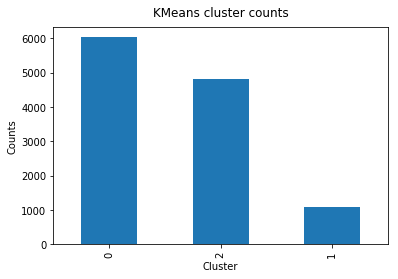

In [172]:
cluster_count.plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Counts")
plt.title("KMeans cluster counts", y=1.02)
plt.show()

Note that sizes may vary considerable between clusters and among different random seeds.

## Problem 2: Summarize clusters

Once you have a clustering, you can try to see whether it is meaningful. One **useful technique** in that context is to generate a **summary** for **each cluster** by **extracting** the **$n$ highest-weighted terms** from the centroid of each cluster. Your next task is to implement this approach.

**Hint:** You will need to **construct** an **&lsquo;inverted vocabulary&rsquo;** that allows you to map from the index of a term back to the original term.

### Testing start
#### This part is just testing


In [173]:
# save kmeans object for this specific exercise
# 
kmeans_p2 = kmeans_p1
cluster_centers = kmeans_p2.cluster_centers_

In [180]:
# check Coordinates of cluster centers
print(cluster_centers)

# we have to find the index of the max k values of each array

# check dimension of the nested array
print("ncol: {}".format(len(cluster_centers)))
ncol = len(cluster_centers)
print("nrow: {}".format(len(cluster_centers[0])))
nrow = len(cluster_centers[0])

[[3.05042594e-04 5.28391140e-04 0.00000000e+00 ... 4.45502443e-05
  3.44213882e-05 2.35197077e-05]
 [2.07289830e-03 9.97789218e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.42649530e-03 8.37028586e-04 5.37167764e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
ncol: 3
nrow: 46619


In [104]:
vectorizer.vocabulary_

{'bought': 5852,
 'album': 2193,
 'loved': 24915,
 'title': 42017,
 'song': 38646,
 'great': 18604,
 'bad': 4137,
 'rest': 34910,
 'right': 35298,
 'songs': 38651,
 'just': 22961,
 'filler': 16212,
 'worth': 46001,
 'money': 27240,
 'paid': 29992,
 'shameless': 37262,
 'bubblegum': 6359,
 'oversentimentalized': 29829,
 'depressing': 11631,
 'tripe': 42711,
 'kenny': 23154,
 'chesney': 7857,
 'popular': 31744,
 'artist': 3360,
 'result': 34949,
 'cookie': 9734,
 'cutter': 10712,
 'category': 7338,
 'nashville': 27940,
 'music': 27714,
 'scene': 36425,
 'gotta': 18392,
 'pump': 32971,
 'albums': 2195,
 'record': 33960,
 'company': 8952,
 'lining': 24480,
 'pockets': 31539,
 'suckers': 40228,
 'buying': 6662,
 'garbage': 17633,
 'perpetuate': 30791,
 'coming': 8846,
 'town': 42319,
 'll': 24627,
 'soapbox': 38464,
 'country': 10025,
 'really': 33718,
 'needs': 28101,
 'roots': 35625,
 'stop': 39740,
 'pop': 31719,
 'nonsense': 28552,
 'considered': 9445,
 'mainstream': 25378,
 'different'

In [175]:
# check the first 10 feature names
vectorizer.get_feature_names()[1:10]

# the indexes of the k highest values do we have to plug in to feature names

['000', '0003', '000mb', '004144', '007', '00am', '00pm', '01', '02']

In [176]:
# check the first array of the nested array
print(len(kmeans_p2.cluster_centers_[0]))
# each array has a length of 46619
print(kmeans_p2.cluster_centers_[0])

46619
[3.05042594e-04 5.28391140e-04 0.00000000e+00 ... 4.45502443e-05
 3.44213882e-05 2.35197077e-05]


In [239]:
# create above in loop
k = 6
# save highest weighted terms in dict
hwt = {}
n_cluster = range(ncol)
for i in n_cluster:
    hwt[i] = np.argpartition(cluster_centers[i], -k)[-k:]

In [241]:
hwt

{0: array([22961,  7423,  2193, 27522, 24390,  5695]),
 1: array([44007, 12123,  6980, 31125, 24143,  6890]),
 2: array([44011, 32568, 38539, 12823, 44007, 32505])}

In [261]:
# access the get_feature_names and plug in the indexes from above

test_dic = {}
test_list = []
for i in range(ncol):
    test_list = []
    for j in range(k):
        test_list.append(vectorizer.get_feature_names()[hwt[i][j]])
    test_dic[i] = test_list

In [262]:
test_dic

{0: ['just', 'cd', 'album', 'movie', 'like', 'book'],
 1: ['use', 'digital', 'canon', 'pictures', 'lens', 'camera'],
 2: ['used', 'program', 'software', 'does', 'use', 'product']}

### Testing end
#### This part is was testing


In [266]:
def summary(k_cluster, N_summary_words):
    "fits k-means with reviews and prints a summary of each cluster"
    
    # create k-means object und fit
    # random_state - so my group partner and I can compare
    kmeans = KMeans(n_clusters=k_cluster, n_init=3,  random_state=13).fit(reviews)
    
    cluster_centers = kmeans.cluster_centers_
    # save dimensions of the nested array
    ncol = len(cluster_centers)
    nrow = len(cluster_centers[0])
    
    ### save highest weighted terms in dict
    
    # in this part I save the N_summary_words INDEX with the hihgest values of each array
    hwt_index = {}
    n_cluster = range(ncol)
    for i in n_cluster:
        hwt_index[i] = np.argpartition(cluster_centers[i], -N_summary_words)[-N_summary_words:]
    
    # in this part I save the N_summary_words WRODS with the hihgest values of each array
    hwt_word = {}
    for i in range(ncol):
        saveinlist = []
        for j in range(k):
            saveinlist.append(vectorizer.get_feature_names()[hwt_index[i][j]])
        hwt_word[i] = saveinlist
    
    for i in range(k_cluster):
        print("Summary of cluster {}:{}".format(i,hwt_word[i]))
    
    #return hwt_word

Once you have computed the cluster summaries, **discuss** their **quality**. Is it **clear** what the reviews in a given cluster are about? Which clusters are **clearest**? Which are **less clear**? Do the cluster summaries contain any unexpected terms? What happens if you **re-cluster** with, say, $k=6$?

In [228]:
# check categories of the review again
print(np.unique(df.category))
print("Length: {}".format(len(np.unique(df.category))))

['books' 'camera' 'dvd' 'health' 'music' 'software']
Length: 6


In [267]:
# Case: 3 cluster, with 6 summary words
summary(3,6)

Summary of cluster 0:['just', 'cd', 'album', 'movie', 'like', 'book']
Summary of cluster 1:['use', 'digital', 'canon', 'pictures', 'lens', 'camera']
Summary of cluster 2:['used', 'program', 'software', 'does', 'use', 'product']


In [268]:
# Case: 6 cluster, with 6 summary words
summary(6,6)

Summary of cluster 0:['song', 'quot', 'songs', 'music', 'cd', 'album']
Summary of cluster 1:['use', 'digital', 'canon', 'pictures', 'camera', 'lens']
Summary of cluster 2:['computer', 'use', 'product', 'version', 'program', 'software']
Summary of cluster 3:['just', 'like', 'use', 'good', 'product', 'great']
Summary of cluster 4:['story', 'reading', 'books', 'author', 'read', 'book']
Summary of cluster 5:['watch', 'story', 'like', 'movies', 'movie', 'film']


** Interpretation **

- General observations

We created the vectorizer with english stop words. However, there are still few meaningful words in all clusters (eg. use, used) that could be fixed with better data preparation via lemma and pos (no verbs). 

- Case: 3 cluster

The overall quality is "Neutral" to express it in the vernacular of Sentiment Analysis.
All clusters have their weaknesses. Some make the combinations of words are, however, there are also words that are inappropriate.
For example, in cluster 0 "cd" and "album" together makes sense, but in combination with "cd", "album" and "movie" makes less sense. These are two different categories (music, movie). 
The words fit best in cluster 1, worst in cluster 0. Cluster 2 makes sense in itself, but 3 of 6 words are not very meaningful.

- Case: 6 cluster

The number of clusters makes sense because we know from previous studies that all descriptions are divided into 6 categories. Therefore, we can also see that the classification is much better than with 3 clusters. 

## Problem 3: Tune the k-means algorithm

A **major limitation** of the **$k$-means** algorithm is that one has to **manually set** the value for $k$, the number of clusters. One **heuristic** that can help you with this is the [Elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). Your next task is to implement this method to see whether it allows you to find a better value for $k$.

To follow the elbow method, you should **plot different** values of $k$ against the **inertia** (sums of squared distances between documents and closest centroids) of the fitted $k$-means model, and pick the $k$ at the &lsquo;elbow point&rsquo; of the resulting graph. Test cluster sizes between 1 and 9.

**Note that this will take a while.**

In [77]:
# loop over grid (range(1,9)) and save inertia_ of each object 
# check how long the cell run

inertia = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, n_init=3,  random_state=13) # to get same results with my group partner
    kmeans.fit(reviews)
    inertia.append(kmeans.inertia_) 
    

In [80]:
inertia = pd.Series(inertia)
print(inertia)

0    11764.202586
1    11696.561592
2    11655.909417
3    11616.535698
4    11584.609693
5    11552.705787
6    11532.566770
7    11496.550916
8    11479.845398
dtype: float64


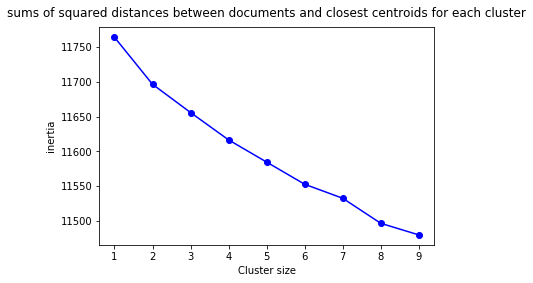

In [99]:
plt.plot(range(1,10),inertia, linestyle='-', marker='o', color='b')
plt.xlabel("Cluster size")
plt.ylabel("inertia")
plt.title("sums of squared distances between documents and closest centroids for each cluster", y=1.02)
plt.show()

Once you have the diagram, can you see a pronounced &lsquo;elbow point&rsquo;? Discuss your findings in a short text.

** Interpretation **

The elbow method is a tool to find a suitable number of clusters when clustering kmeans. However, it is hard to tell from this plot what the ideal number of clusters is. It looks like sums of squared distances are reduced at similar intervals. However, it can be seen that cluster 7's reduction is less than in the steps before.
This information and the information from the previous task, I would set 6 as the number of clusters.


## Problem 4: Compare clusterings using the Rand index

In some scenarios, you may have **gold-standard class labels available** for at least a subset of your documents. In these cases you can compute the **Rand index** of a clustering, and use this **measure to compare the quality of different clusterings**.

To **compute** the **Rand index**, we view a clustering as a binary classifier on pairs of documents. The **classifier predicts** **&lsquo;positive&rsquo;** *if and only if* the **two documents belong to the same cluster**. The (non-normalized) Rand index of the clustering is the accuracy of this classifier relative to a reference in which a document pair belongs to the &lsquo;positive&rsquo; class if and only if the two documents in the pair have the same gold-standard class label.

Compare a **clustering with** $k=3$ clusters to a **second clustering** with $k=6$ clusters. As your **evaluation data**, use the **first 500 documents** from the original data set along with their **gold-standard categories** (from the `category` column). What do you **observe**? How do you **interpret** your observations? What **arguments** can you find **against** the **Rand index** as a measure for comparing clusterings?

In [ ]:
# TODO: Enter code here to compute the Rand indices for the two clusterings

In [276]:
# create the evaluate data
evaluation = df[0:500]
evaluation_text = df[0:500]
evaluation_text = evaluation_text.text

In [271]:
# case k = 3
# init kmean object
k_cluster = 3

# random_state - so my group partner and I can compare
kmeans_p4k3 = KMeans(n_clusters=k_cluster, n_init=3,  random_state=13).fit(reviews)

In [278]:
kmeans_p4k3.predict(evaluation_text)

ValueError: could not convert string to float: "i bought this album because i loved the title song . it 's such a great song , how bad can the rest of the album be , right ? well , the rest of the songs are just filler and are n't worth the money i paid for this . it 's either shameless bubblegum or oversentimentalized depressing tripe . kenny chesney is a popular artist and as a result he is in the cookie cutter category of the nashville music scene . he 's gotta pump out the albums so the record company can keep lining their pockets while the suckers out there keep buying this garbage to perpetuate more garbage coming out of that town . i 'll get down off my soapbox now . but country music really needs to get back to it 's roots and stop this pop nonsense . what country music really is and what it is considered to be by mainstream are two different things ."

In [ ]:
# case k = 6
# init kmean object
k_cluster = 6

# random_state - so my group partner and I can compare
kmeans_p4k6 = KMeans(n_clusters=k_cluster, n_init=3,  random_state=13).fit_predictre(reviews)

*TODO: Insert your discussion of your results here*

## Topic modelling data set

The **data set for the topic modelling part** of this lab is the collection of all [State of the Union](https://en.wikipedia.org/wiki/State_of_the_Union) addresses from the years 1975–2000. These speeches come as a single text file with one sentence per line. The following code cell prints the first 5 lines from the data file:

In [279]:
with open("sotu_1975_2000.txt") as source:
    for i, line in enumerate(source):
        print(line.rstrip())
        if i >= 5:
            break

mr speaker mr vice president members of the 94th congress and distinguished guests
twenty six years ago a freshman congressman a young fellow with lots of idealism who was out to change the world stood before sam rayburn in the well of the house and solemnly swore to the same oath that all of you took yesterday an unforgettable experience and i congratulate you all
two days later that same freshman stood at the back of this great chamber over there someplace as president truman all charged up by his single handed election victory reported as the constitution requires on the state of the union
when the bipartisan applause stopped president truman said i am happy to report to this 81st congress that the state of the union is good our nation is better able than ever before to meet the needs of the american people and to give them their fair chance in the pursuit of happiness it is foremost among the nations of the world in the search for peace
today that freshman member from michigan stan

## Problem 5: Train a topic model

Your first task on the topic modelling data is to **train** an **LDA model**. For this task you will be using [spaCy](https://spacy.io/) and the [gensim](https://radimrehurek.com/gensim/) topic modelling library.

Start by **preprocessing** the **data using spaCy**. Given that the data set for this problem is rather small, you do not have to exclude any components from the standard pipeline. **Filter out stop words, non-alphabetic tokens, and tokens less than 3 characters in length**. **Store** the **documents** as a **nested list** where the first level of nesting corresponds to the sentences and the second level corresponds to the tokens in each sentence.

In [ ]:
# TODO: Replace the following lines with your own code for preprocessing the documents
with open("sotu_1975_2000.txt") as source:
    documents = [line.split() for line in source]

Test your preprocessing by running the following cell:

In [ ]:
" ".join(documents[42])

You should get the following output:

Once you have the list of documents, skim the section [Pre-process and vectorize the documents](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#pre-process-and-vectorize-the-documents) of the gensim documentation to learn how to create the dictionary and the vectorized corpus representation required by gensim. (Note that you cannot use the standard scikit-learn pipeline in this case.) Then, write code to train an [LdaModel](https://radimrehurek.com/gensim/models/ldamodel.html) for $k=10$ topics, and using default values for all other parameters.

In [ ]:
# TODO: Enter code here to train an LDA model

Once you have a trained model, run the following cell to print the topics:

In [ ]:
model.print_topics()

Inspect the topics. Do they make sense? Can you &lsquo;label&rsquo; each topic with a short description of what it is about? Do the topics contain any unexpected terms? Summarize your discussion in a short text.

*TODO: Insert your discussion of the topics here*

## Problem 6: Monitoring a topic model for convergence

When learning an LDA model, it is important to make sure that the training algorithm has converged to a stable posterior distribution. One way to do so is to plot, after each training epochs(or &lsquo;pass&rsquo;, in gensim parlance) the log likelihood of the training data under the posterior. Your last task in this lab is to create such a plot and, based on this, to suggest an appropriate number of epochs.

To collect information about the posterior likelihood after each pass, we need to enable the logging facilities of gensim. Once this is done, gensim will add various diagnostics to a log file `gensim.log`.

In [ ]:
import logging

logging.basicConfig(filename="gensim.log", format="%(asctime)s:%(levelname)s:%(message)s", level=logging.INFO)

The following function will parse the generated logfile and return the list of log likelihoods.

In [ ]:
import re

def parse_logfile():
    matcher = re.compile("(-*\d+\.\d+) per-word .* (\d+\.\d+) perplexity")
    likelihoods = []
    with open("gensim.log") as source:
        for line in source:
            match = matcher.search(line)
            if match:
                likelihoods.append(float(match.group(1)))
    return likelihoods

Your task now is to re-train your LDA model for 50&nbsp;passes, retrieve the list of log likelihoods, and create a plot from this data.

In [ ]:
# TODO: Enter code here to generate the convergence plot

How do you interpret your plot? What would be a reasonable choice for the number of passes? Retrain your LDA model with that number and re-inspect the topics it finds. Do you consider the new topics to be &lsquo;better&rsquo; than the ones that you got from the 1-pass model in Problem&nbsp;5?

*TODO: Insert your discussion of these questions here*

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>

### helpful links:

- vectorization

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

https://python-graph-gallery.com/cheat-sheets/
    

- k-mean

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

- plot

https://dfrieds.com/data-visualizations/bar-plot-python-pandas

- max value index

https://stackoverflow.com/questions/16817948/i-have-need-the-n-minimum-index-values-in-a-numpy-array

- dict

https://stackoverflow.com/questions/30280856/populating-a-dictionary-using-for-loops-python
https://stackoverflow.com/questions/5404665/accessing-elements-of-python-dictionary-by-index